# Analyzing the Impact of CO2 Emissions on Temperature Change

## Table of Contents
1. [Introduction](#introduction)
2. [Used Data](#used-data)
    - [Data-Source 1](Data-Source-1)
    - [Data-Source 2](#Data-Source-2)
    - [Pipeline Output](#Pipeline-Output)
3. [Analysis](#analysis)
    - [Data Preparation](#data-preparation)
    - [Correlation Analysis](#correlation-analysis)
    - [Visualization](#visualization)
    - [Regression Analysis](#regression-analysis)
4. [Results](#results)
    - [Global Analysis](#global-analysis)
    - [Country-Specific Analysis](#country-specific-analysis)
5. [Conclusions](#conclusions)
    - [Limitations](#Limitations)
    - [Future Work](#Future-Work)


### Introduction

Climate change is a critical global issue  because of its effect on ecosystems, human health, and economies. This project investigates the relationship between temperature changes and CO2 emissions through statistical  analysis. The results are expected to show how much CO2 emissions contribute to tmperature change. They may be used as information for future policy decisions related to greenhouse gas emissions .

In this report, analysis are performed on following topics:

- How Have Temperature Changes and CO2 Emission  Varied Over the Years ?
- What is the Impact of CO2 Emissions on Temperature Change Globally ? 
- What is the Impact of CO2 Emissions on Temperature Change in Individual Countries ? 


### Used Data 

#### Datasource 1: FAO Temperature Change
- **Why Chosen:** The dataset provides annual temperature change for various countries and it's from trustworthy source.
- **Source:** Food and Agriculture Organization (FAO)
- **Data Contains:** The FAOSTAT Temperature change on land domain disseminates statistics of mean surface temperature change by country.
- **Metadata URL:** [FAO Temperature Change Metadata](http://www.fao.org/faostat/en/#data/ET/metadata)
- **Data URL:** [FAO Temperature Change Data](https://fenixservices.fao.org/faostat/static/bulkdownloads/Environment_Temperature_change_E_All_Data.zip)
- **Transformation steps on FAO Temperature Dataset:**
    - Only keeping  the records  where there is a temperature variation remove standard daviation category.
    - Eliminate not useful columns like "Area Code," "Area Code (M49)," "Element Code," "Months Code," "Unit," and "Element as these columns have no real purpose in the analysis"
    - Use `pd.melt()` to reshape the data from wide to long format as it will be useful to time series analysis.
    - Eliminating 'Y' from column name as it is ambeded in years e.g Y1998 -> 1998.
    - Compile annual data by calculating the average annual temperature change from given months.



#### Datasource 2: World Bank CO2 Emissions Dataset
- **Why Chosen:** This dataset offers extensive CO2 emissions data yearly for various countires
- **Source:** World Bank
- **Data Contains:** CO2 emissions data (in kilotons) for various countries.
- **Metadata URL:** [World Bank CO2 Emissions Metadata](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT)
- **Data URL:** [World Bank CO2 Emissions Data](https://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv)
- **Transformation steps on World Bank CO2 Data:**
    - Rename columns (such as "Country Name" to "Area") to maintain consistency between datasets.
    - Eliminate columns like "Indicator Code" and "Indicator Name as they they serve no usecase in our analysis"
    - Use `pd.melt()` to reshape the data from wide to long format useful for time series analysis.
    - Remove records where the CO2 emission numbers are absent.
    - Convert the 'year' and 'co2_emissions' data types to achive consistancy.
    - Rename column names  to keep everything uniform between data sources.



#### Pipeline Output :
- **Description:** The  sqlite dataset containing tables comprising tranformed data  on annual temperature changes and CO2 emissions is the pipeline's output.
- **Format:** The merged data is kept in a table called `tempCO2` in a SQLite database called `pipelineDB.sqlite`.


In [2]:
#display merged table results
import pandas as pd
merged_df = pd.read_sql_table('tempCO2', 'sqlite:///../data/pipelineDB.sqlite')
co_df = pd.read_sql_table('CO2_emissions', 'sqlite:///../data/pipelineDB.sqlite')
merged_df.head()

,Area,Year,Change,country_code,co2_emissions
0,Afghanistan,1990,0.714000,AFG,2046.87
1,Afghanistan,1991,0.138333,AFG,1941.37
2,Afghanistan,1992,-0.185917,AFG,1525.47
3,Afghanistan,1993,0.163000,AFG,1527.89
4,Afghanistan,1994,0.469667,AFG,1493.59


### Analysis



#### Method
The analysis aimed to determine if there is a significant impact of CO2 emissions on temperature changes, both globally and for individual countries.


#### Individual Analysis
Before Analyzing the for Correlation between temperature and CO2 it is important to analyze how these have varied over the year thus  A line plot is used  to simultaneously represent both Co2 emissions  and temperature change.  The line in each plot indicates the average (mean) value for each year, while the shaded area around the line represents the range of variability (upper and lower bounds) for each year, offering insights into yearly fluctuations.

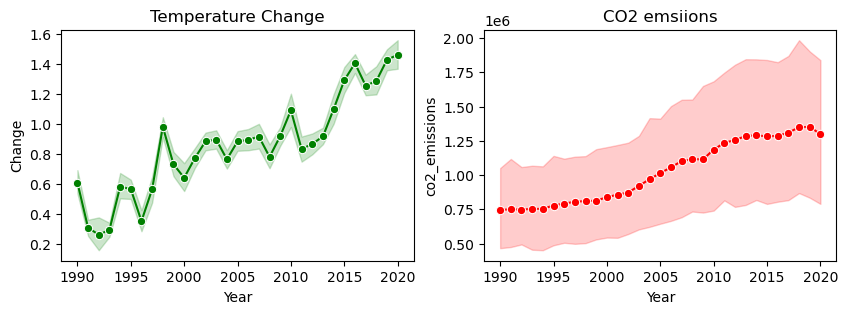

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
sns.lineplot(data=merged_df, x='Year', y='Change', ax=ax1, marker='o', color='g')
ax1.set_title('Temperature Change')
sns.lineplot(data=co_df, x='Year', y='co2_emissions', ax=ax2, marker='o', color='r')
ax2.set_title('CO2 emsiions')
plt.show()

Inference

- There's been a noticeable increase in temperature over the recent years. This trend was foreseeable, as climate change gets more drastic.
- Co2 emission  has shown an steady but constant upward trend 

- As CO2 emissions have increased, there has been a corresponding increase in global temperatures.

#### Correlation Analysis:

Pearson Correlation Coefficient: Used to measure the linear relationship between CO2 emissions and temperature changes. This coefficient ranges from -1 to 1, indicating a negative to positive correlation, respectively. A positive value suggests that as CO2 emissions increase, temperature changes also increase



/var/folders/sk/fn4_hptd42nbr6_wdcgx06hm0000gn/T/ipykernel_9127/4069468532.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_stats_with_corr['Correlation'] = country_df.groupby('Area').apply(
/var/folders/sk/fn4_hptd42nbr6_wdcgx06hm0000gn/T/ipykernel_9127/4069468532.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5_countries['Area'], rotation=45)


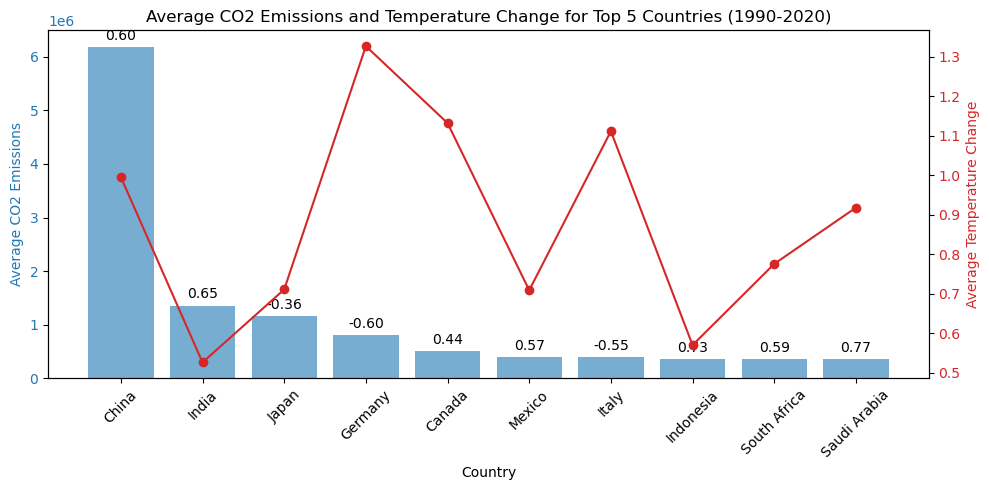

In [8]:
world_df = merged_df[merged_df['Area'] == 'World'] 
country_df = merged_df[merged_df['Area'] != 'World'] 

# Calculate average CO2 emissions and temperature change for each country
average_stats_with_corr = country_df.groupby('Area').agg(
    Average_CO2_Emissions=('co2_emissions', 'mean'),
    Average_Temperature_Change=('Change', 'mean')
).reset_index()

# Calculate the Pearson correlation coefficient for each country
average_stats_with_corr['Correlation'] = country_df.groupby('Area').apply(
    lambda x: x['co2_emissions'].corr(x['Change'])
).reset_index(drop=True)

# Filter the top 5 countries by average CO2 emissions
top_5_countries = average_stats_with_corr.nlargest(10, 'Average_CO2_Emissions')

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for Average CO2 Emissions
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Average CO2 Emissions', color=color)
bars = ax1.bar(top_5_countries['Area'], top_5_countries['Average_CO2_Emissions'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_5_countries['Area'], rotation=45)

# Adding the correlation coefficient labels on top of the bars
for bar, corr in zip(bars, top_5_countries['Correlation']):
    height = bar.get_height()
    ax1.annotate(f'{corr:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Secondary axis for Average Temperature Change
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Temperature Change', color=color)
ax2.plot(top_5_countries['Area'], top_5_countries['Average_Temperature_Change'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
plt.title('Average CO2 Emissions and Temperature Change for Top 5 Countries (1990-2020)')
fig.tight_layout()

plt.show()

In [1]:
# Remove 'World' from the dataset
#merged_df = merged_df[merged_df['Area'] != 'World']

# Select the top 10 countries by average CO2 emissions
average_stats_with_corr = merged_df.groupby('Area').agg(
    Average_CO2_Emissions=('co2_emissions', 'mean'),
    Average_Temperature_Change=('Change', 'mean')
).reset_index()

top_10_countries = average_stats_with_corr.nlargest(10, 'Average_CO2_Emissions')['Area']

# Filter the merged_df to include only the top 10 countries
filtered_df = merged_df[merged_df['Area'].isin(top_10_countries)]

# Plot the CO2 emissions and temperature changes for each of the top 10 countries
plt.figure(figsize=(10, 20))

for i, country in enumerate(top_10_countries, 1):
    plt.subplot(5, 2, i)
    country_data = filtered_df[filtered_df['Area'] == country]
    
    # Plot CO2 emissions
    ax1 = sns.lineplot(x='Year', y='co2_emissions', data=country_data, color='blue', label='CO2 Emissions')
    ax1.set_ylabel('CO2 Emissions')
    
    # Plot temperature changes on secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(x='Year', y='Change', data=country_data, color='green', ax=ax2, label='Temperature Change')
    ax2.set_ylabel('Temperature Change')
    
    # Calculate and display the correlation coefficient
    correlation = country_data['co2_emissions'].corr(country_data['Change'])
    plt.title(f'{country} Correlation: {correlation:.2f}')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.suptitle('CO2 Emissions and Temperature Change Correlation Over the Years for Top 10 Countries', y=1.02)
plt.show()

NameError: name 'merged_df' is not defined

Global Analysis:

Correlation Coefficient: The global analysis revealed a significant positive correlation between CO2 emissions and temperature changes. This suggests that  CO2 emissions are associated with greater temperature changes globally.


Country-Specific Analysis:

Varying Degrees of Correlation: Some countires show positive corraltion with while other show negative correlation but the values show the CO2 emissions impact the temperture change to some degree.

The analysis confirms a significant relationship between CO2 emissions and temperature changes for various individual countries. This finding supports the hypothesis that CO2 emissions are a major driver of global warming. The correlation  provide a robust framework for understanding how CO2 emissions influence temperature changes.

Key Insights:

Global Impact: The strong positive correlation on a global scale underscores the importance of addressing CO2 emissions to mitigate climate change.
Country-Specific Variations: The varying degrees of correlation among the top 10 countries suggest that while CO2 emissions are a significant factor, other local factors may also influence temperature changes.


#### Conclusion

  Based on the analysis it is evident that the correlation between CO2 emissions and temperature changes varies by country. Some countries show a strong positive correlation, suggesting that higher CO2 emissions are associated with significant temperature changes. In contrast, others show weak or no correlation, indicating that other factors might influence temperature changes in those regions

##### Limitations:

- **linear relationships:** The analysis assumes linear relationships between temperature and CO2 emission, which may not capture all dynamics of climate change.
Data quality and completeness can vary by country, potentially affecting the results.
- **Quality of Data:**  Different countries may have reported or documented data in inconsistent or using difrrent measures thus resulting in inconsitancy in data.
- **Resolution Time:** It is not possible to do short term analysis as the data set offers annual data. 
- **Application and Use:**  Non commercial usage on data sources restricts the data sets to be used for commercial application ideas

##### Future Work:

- **Other Factors:** Incorporating other greenhouse gases and factors such as deforestation and industrial activities could provide a more comprehensive understanding of climate change.

- **Mitigate Emissions:** This report provides a robust foundation for understanding the impact of CO2 emissions on temperature changes, emphasizing the need for continued efforts to mitigate emissions to address climate change effectively.